In [3]:
import numpy as np #numpy version 1.19.5
import pandas as pd #pandas version 1.2
from sklearn.datasets import load_iris #sklearn version 0.23.2 or 0.24
from mlxtend.feature_selection import SequentialFeatureSelector as SFS #mlxtend version 0.18

from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

#scale data
X = pd.read_csv( 'protein.csv' ) 
X = X.drop(['ID'], axis=1)
imputer = KNNImputer(n_neighbors=3) #k-nearest neighbors impute, 
X = imputer.fit_transform(X)

In [4]:
X=pd.DataFrame(X)
X = X.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X= scaler.fit_transform(X)
#X=pd.DataFrame(X)
X

,1,2,3,4,5,6,7,8,9,10
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079
492,0.152008,-1.686879,1.489334,0.834950,-4.749197,-2.084045,-0.782886,-0.129883,0.496630,-1.550106


Drop all rows with z-wcore over 2.5

In [5]:
from scipy import stats
z = pd.DataFrame(stats.zscore(X, axis=1, ddof=1))
indexNames = z[  (np.abs(z[0])>2.5) | (np.abs(z[1])>2.5) | (np.abs(z[2])>2.5) | (np.abs(z[3])>2.5) | (np.abs(z[4]) >2.5) | (np.abs(z[5])>2.5) | (np.abs(z[6])>2.5) | (np.abs(z[7])>2.5) | (np.abs(z[8])>2.5) | (np.abs(z[9])>2.5) ].index 
indexNames

Int64Index([ 17,  19,  59,  61,  63,  64,  68,  71,  75,  91,  92,  98, 112,
            124, 135, 136, 152, 153, 155, 158, 165, 173, 179, 196, 200, 204,
            205, 207, 208, 211, 213, 214, 224, 233, 235, 243, 250, 265, 273,
            279, 280, 286, 294, 304, 305, 315, 322, 326, 335, 345, 347, 352,
            357, 364, 369, 371, 383, 384, 387, 390, 399, 407, 408, 410, 411,
            418, 422, 443, 457, 465, 477, 482, 484, 485, 493],
           dtype='int64')

In [6]:
X = X.drop(indexNames )
X

,1,2,3,4,5,6,7,8,9,10
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
488,1.308182,-0.743505,0.483344,-5.582024,0.200337,-2.903750,0.085492,-1.746900,0.910038,2.292125
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.array(X[6])
y = np.array(X[1])


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

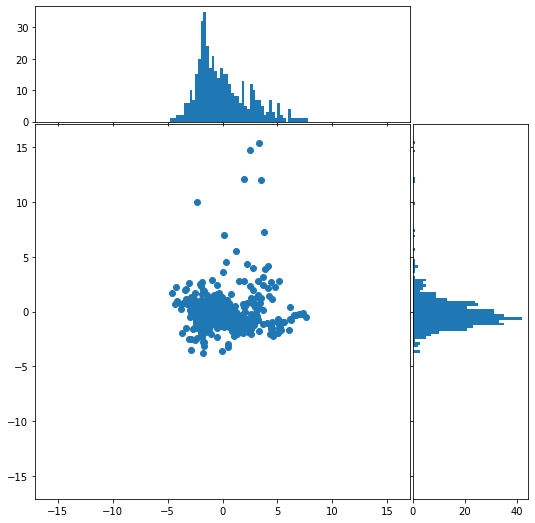

In [8]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5,  covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

gm = gm.fit(X)

gm.means_

array([[-0.15154626, -0.50564988, -0.86328486,  0.70426979, -2.09262875,
         3.00021059, -0.38268128, -0.66556013,  0.83884051,  0.20013589],
       [ 0.15418151, -0.53388504, -0.07445949,  4.06627914, -1.53944194,
        -0.82331066,  0.40576157,  0.7982303 , -1.05348405,  0.66912901],
       [-0.43007386, -0.11115531, -0.11546074,  2.16878031,  3.54969042,
        -1.23427914, -0.33069114, -0.74863008,  0.52148772, -0.42012196],
       [10.54739155,  8.46562137,  4.86814771,  6.32393302, -1.27552194,
         2.35445461,  2.04670728, -0.29961765,  2.30486779, -1.55660001],
       [-0.24881743,  0.27544172,  0.45076124, -2.99806302, -0.03114087,
        -0.10100325,  0.09416999,  0.2915247 ,  0.02883069, -0.10897962]])

Visualize using principal component analysis
3 dim

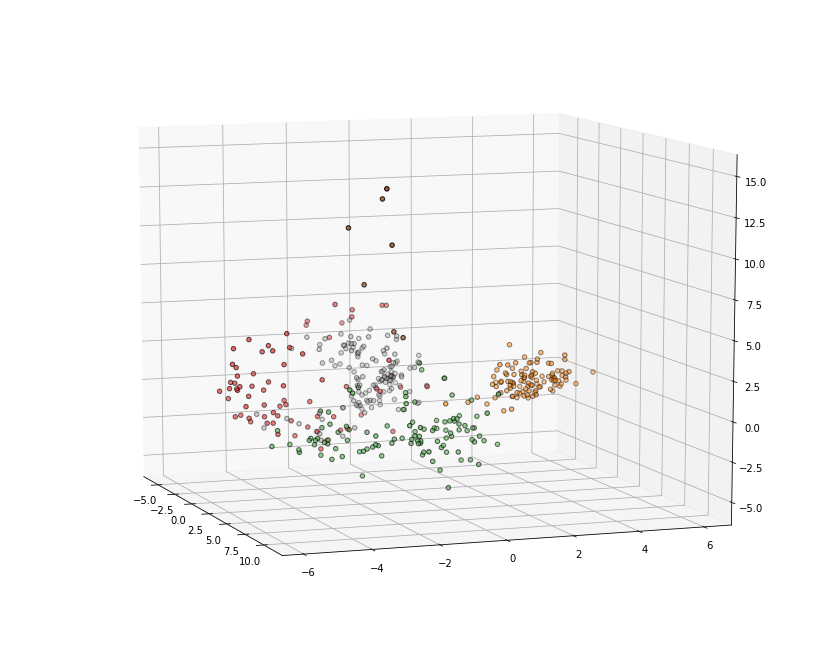

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=-20)

y = gm.predict(X) #labels

pca = decomposition.PCA(n_components=3)
X_new = pca.fit_transform(X)

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y,cmap=plt.cm.get_cmap('Set1', 5),
           edgecolor='k')



plt.show()

2 dim PCA

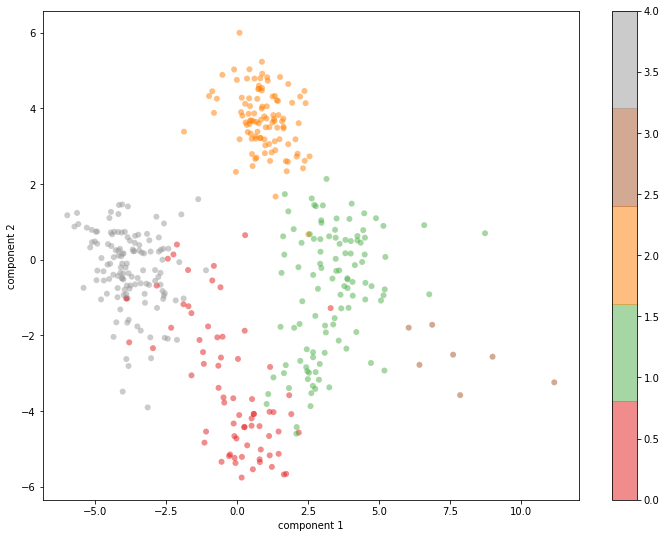

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))

y = gm.predict(X) #labels

pca = decomposition.PCA(n_components=2)
X_2 = pca.fit_transform(X)
plt.scatter(X_2[:, 0], X_2[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [12]:
gm.score(X)

-13.502059397650727

Check best number of components is actually 5 as required and figure out best covariance_type argument using BIC score

In [13]:
lowest_bic = np.infty
bic = []
n_components_range = range(4, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [14]:
best_gmm.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>

In [15]:
df = pd.DataFrame(gm.means_) #centriods
df

,0,1,2,3,4,5,6,7,8,9
0,-0.151546,-0.505650,-0.863285,0.704270,-2.092629,3.000211,-0.382681,-0.665560,0.838841,0.200136
1,0.154182,-0.533885,-0.074459,4.066279,-1.539442,-0.823311,0.405762,0.798230,-1.053484,0.669129
2,-0.430074,-0.111155,-0.115461,2.168780,3.549690,-1.234279,-0.330691,-0.748630,0.521488,-0.420122
3,10.547392,8.465621,4.868148,6.323933,-1.275522,2.354455,2.046707,-0.299618,2.304868,-1.556600
4,-0.248817,0.275442,0.450761,-2.998063,-0.031141,-0.101003,0.094170,0.291525,0.028831,-0.108980


In [16]:
gm.lower_bound_ #lower bond on likelihood

-13.502066550501548

In [ ]:
gm.covariances_

## Cluster sizes
###Below we get array of proportionate size of each cluster, labels 2,3,5 most prevalent

In [18]:
gm.weights_ #P(y_i)

array([0.17104166, 0.2554267 , 0.24582302, 0.01670644, 0.31100217])

similarity within virus mutations

In [19]:
#similarity within virus mutation

##Spectral Clustering
Apply clustering to a projection of the normalized Laplacian.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

In [20]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=5,
        assign_labels="discretize",
        random_state=0).fit(X)

clustering

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=5, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

visualize using principal component analysis

##plot covariance matrix for each component and calculate determinant of each covariance matrix

In [21]:
#importing all the libraries needed
#import seaborn as sns
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#df_new = pd.DataFrame(gm.covariances_) #covariance matrix with diagonal cv
#df_new = df_new.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})
#fig, ax = plt.subplots(figsize=(10,10)) #resize
#sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


negative correltion (1,3)



postive correlation (1,5), (8,9)

## Feature Importance PCA
Determine 5 most important features for descriminating mutation groups:

1.principal component analysis

with scoring function f1 score on test  set

used https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e section 7 Feature Importance


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
comp= pd.DataFrame(np.abs(pca.components_))
comp = comp.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})

In [23]:
comp #matrix of entries of 5 principal components of the decomposition

,1,2,3,4,5,6,7,8,9,10
0,0.184070,0.070664,0.013771,0.971821,0.056322,0.028007,0.096991,0.026441,0.026883,0.041400
1,0.018053,0.013117,0.036170,0.051566,0.820470,0.548086,0.115713,0.010004,0.052647,0.075522
2,0.520500,0.376402,0.093974,0.068073,0.408022,0.608278,0.050273,0.082139,0.129948,0.106265
3,0.446509,0.514427,0.258918,0.159806,0.326635,0.545987,0.083956,0.133144,0.104982,0.053182
4,0.260165,0.354123,0.292324,0.079348,0.036274,0.012480,0.582023,0.241101,0.554519,0.096533


In first PC, feature 4 is most important


> 


In second PC, features 5,6 most important (in order)


> 





In third PC, features 6,1,5 (in order) ""


> 

In fourth PCA features 6,2,1 (in order) most important



In summary, features 4,5,6,1,2 most important

#Silhouette Score



> 


1.   evaluates separation betwen clusters and cohesion within each cluster
2. score -1 to 1 where 1 is best score


> 



https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [24]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X,y)

In [25]:
sil_score

0.30720875092400773

Plot silhouette  score for each cluster and silhouette score for entire dataset

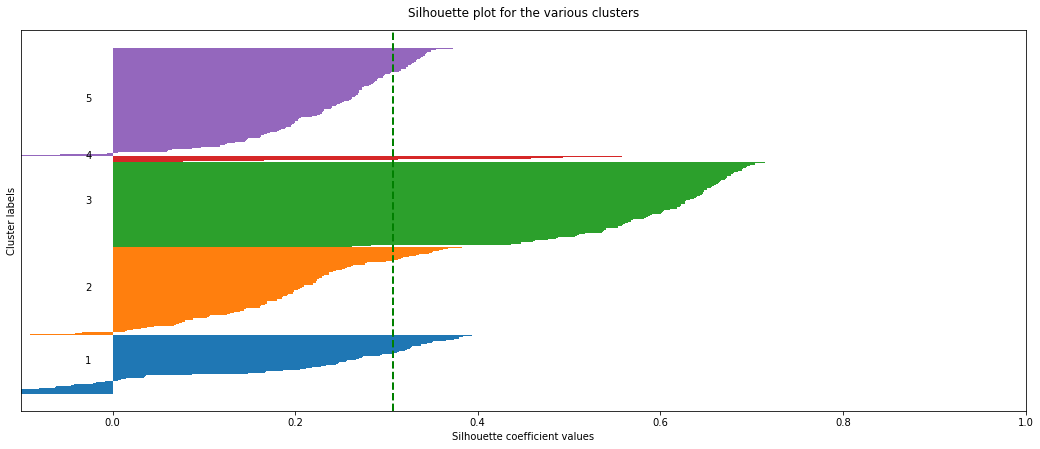

In [26]:
from sklearn.metrics import silhouette_samples
  
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
# Get silhouette samples
silhouette_vals = silhouette_samples(X, y)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = silhouette_vals[y == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    

Some more evaluation criteria : https://en.wikipedia.org/wiki/Cluster_analysis#Internal_evaluation

Computes the Davies-Bouldin score.

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [27]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X,y)
print("The DB score is {0:.2f}".format(db_score)) #lower the better


The DB score is 1.30


# Feature Importance

##1.Train classifier on labeled data (labeled by GMM) and obtain most important features

1.   List item
2.   List item



### Sequential Forward Selection

### 1.decision tree classifier

In [28]:
# see https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
clf = DecisionTreeClassifier(random_state=0)
sfs_forward = SFS(clf, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)


sfs_forward = sfs_forward.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-01-13 10:04:54] Features: 1/5 -- score: 0.7039300057372347[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-01-13 10:04:54] Features: 2/5 -- score: 0.8878657487091223[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2021-01-13 10:04:54] Features: 3/5 -- score: 0.9380091795754446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [29]:
sfs_forward.subsets_

{1: {'avg_score': 0.7039300057372347,
  'cv_scores': array([0.72619048, 0.71428571, 0.75      , 0.67857143, 0.65060241]),
  'feature_idx': (3,),
  'feature_names': (4,)},
 2: {'avg_score': 0.8878657487091223,
  'cv_scores': array([0.92857143, 0.82142857, 0.92857143, 0.85714286, 0.90361446]),
  'feature_idx': (3, 4),
  'feature_names': (4, 5)},
 3: {'avg_score': 0.9380091795754446,
  'cv_scores': array([0.94047619, 0.9047619 , 0.95238095, 0.92857143, 0.96385542]),
  'feature_idx': (3, 4, 5),
  'feature_names': (4, 5, 6)},
 4: {'avg_score': 0.9498565691336776,
  'cv_scores': array([0.95238095, 0.91666667, 0.95238095, 0.98809524, 0.93975904]),
  'feature_idx': (1, 3, 4, 5),
  'feature_names': (2, 4, 5, 6)},
 5: {'avg_score': 0.9594377510040161,
  'cv_scores': array([0.95238095, 0.92857143, 0.95238095, 1.        , 0.96385542]),
  'feature_idx': (1, 3, 4, 5, 7),
  'feature_names': (2, 4, 5, 6, 8)}}

###2. k-nearest neighbors

In [30]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
clf = DecisionTreeClassifier(random_state=0)
sfs_forward_2 = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)


sfs_forward_2 = sfs_forward_2.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-01-13 10:04:55] Features: 1/5 -- score: 0.677710843373494[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-01-13 10:04:55] Features: 2/5 -- score: 0.9140849110728629[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2021-01-13 10:04:55] Features: 3/5 -- score: 0.9522948938611588[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [31]:
sfs_forward_2.subsets_

{1: {'avg_score': 0.677710843373494,
  'cv_scores': array([0.6547619 , 0.76190476, 0.72619048, 0.60714286, 0.63855422]),
  'feature_idx': (3,),
  'feature_names': (4,)},
 2: {'avg_score': 0.9140849110728629,
  'cv_scores': array([0.91666667, 0.91666667, 0.92857143, 0.89285714, 0.91566265]),
  'feature_idx': (3, 4),
  'feature_names': (4, 5)},
 3: {'avg_score': 0.9522948938611588,
  'cv_scores': array([0.95238095, 0.92857143, 0.95238095, 0.96428571, 0.96385542]),
  'feature_idx': (0, 3, 4),
  'feature_names': (1, 4, 5)},
 4: {'avg_score': 0.9761331038439472,
  'cv_scores': array([1.        , 0.95238095, 0.97619048, 0.97619048, 0.97590361]),
  'feature_idx': (0, 3, 4, 5),
  'feature_names': (1, 4, 5, 6)},
 5: {'avg_score': 0.9785427423981641,
  'cv_scores': array([1.        , 0.95238095, 0.97619048, 0.97619048, 0.98795181]),
  'feature_idx': (0, 1, 3, 4, 5),
  'feature_names': (1, 2, 4, 5, 6)}}

###Ensemble of Trees

In [32]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.0351417  0.04810295 0.03947974 0.33355886 0.21921392 0.10581036
 0.03441508 0.06731442 0.07739104 0.03957194]


We get features 4,5 most important

#Cluster Analysis

##1.Means of each cluster

In [33]:
df = pd.DataFrame(gm.means_) #centriods
df

,0,1,2,3,4,5,6,7,8,9
0,-0.151546,-0.505650,-0.863285,0.704270,-2.092629,3.000211,-0.382681,-0.665560,0.838841,0.200136
1,0.154182,-0.533885,-0.074459,4.066279,-1.539442,-0.823311,0.405762,0.798230,-1.053484,0.669129
2,-0.430074,-0.111155,-0.115461,2.168780,3.549690,-1.234279,-0.330691,-0.748630,0.521488,-0.420122
3,10.547392,8.465621,4.868148,6.323933,-1.275522,2.354455,2.046707,-0.299618,2.304868,-1.556600
4,-0.248817,0.275442,0.450761,-2.998063,-0.031141,-0.101003,0.094170,0.291525,0.028831,-0.108980


##2. Covariance matrix of each cluster

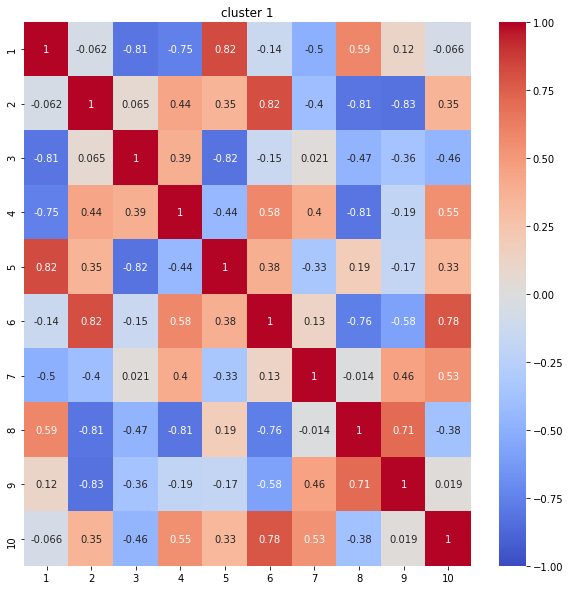

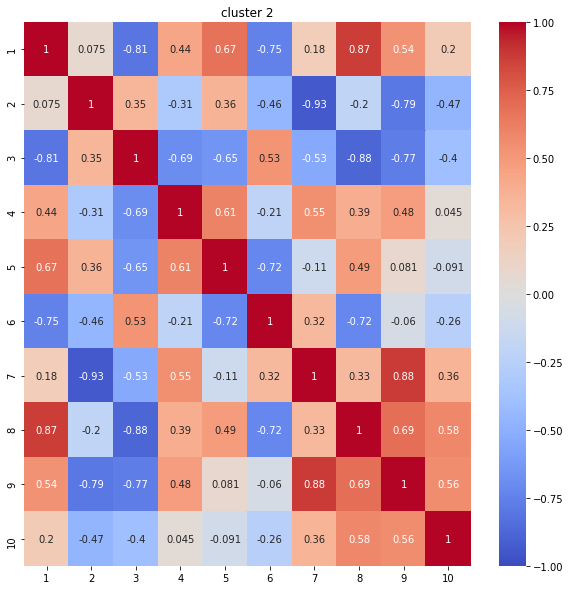

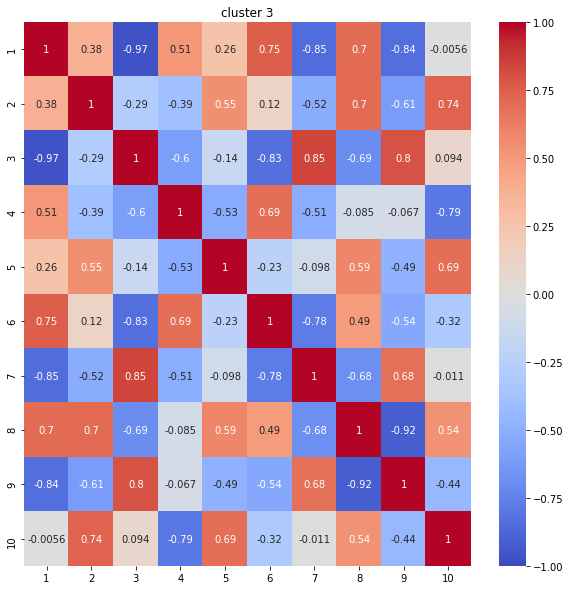

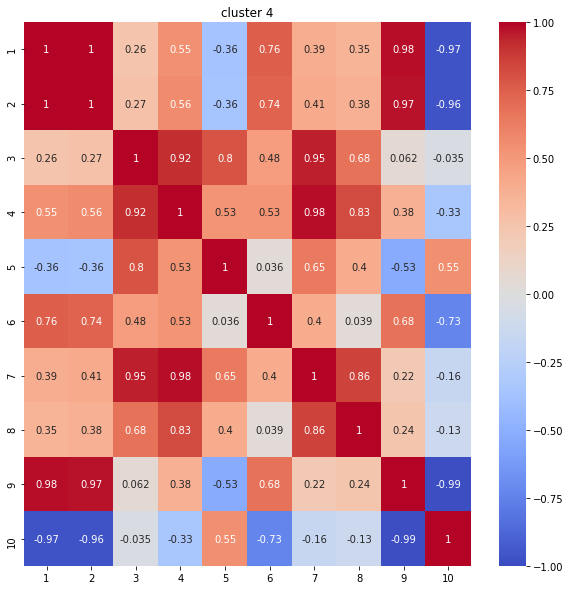

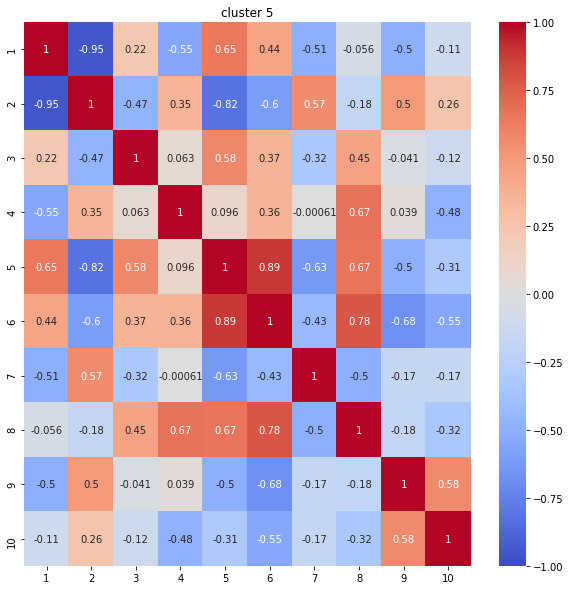

In [34]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for item in range(5):
  df_new = pd.DataFrame(gm.covariances_[item]) #covariance matrix with diagonal cv
  df_new = df_new.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})
  fig, ax = plt.subplots(figsize=(10,10)) #resize
  sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm').set_title('cluster {}'.format(item+1)) #heatmap


##3.Silhouette score for each cluster

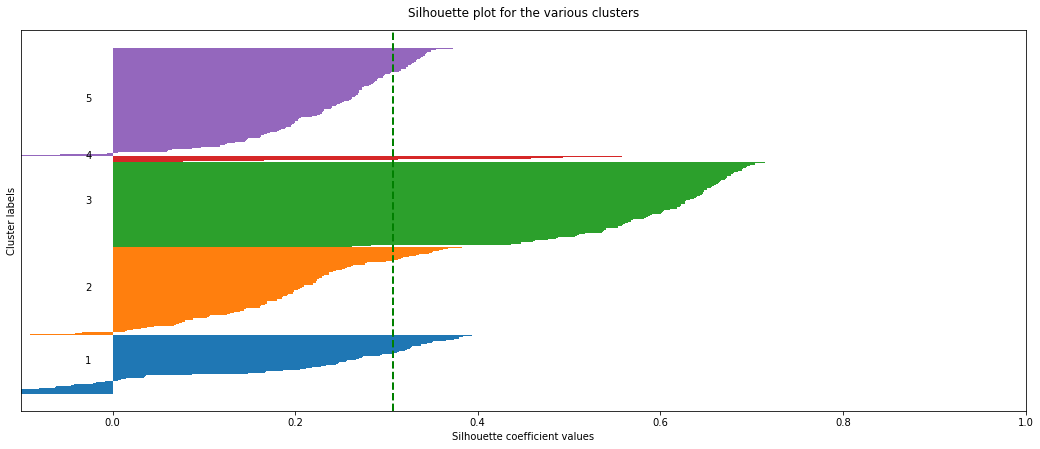

In [35]:
from sklearn.metrics import silhouette_samples
  
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
# Get silhouette samples
silhouette_vals = silhouette_samples(X, y)
#avg silhouette score for each cluster
avg_cluster = []
#avg Davies-Bouldin score for each cluster
avg_db = []
# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = silhouette_vals[y == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)
    avg_cluster.append( np.mean(cluster_silhouette_vals) )

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);



##### Ranking by virus strain:


1.   virus strain 3
2.   virus strain 4
3.   virus strain 5
4.   virus strain 2
5.   virus strain 1 






In [36]:
print("silhouette score for mutant virus 3: {}".format(avg_cluster[2]))    
print("\n")
print("silhouette score for mutant virus 4: {}".format(avg_cluster[3]))    
print("\n")
print("silhouette score for mutant virus 5: {}".format(avg_cluster[4]))    
print("\n")
print("silhouette score for mutant virus 2: {}".format(avg_cluster[1]))    
print("\n")
print("silhouette score for mutant virus 1: {}".format(avg_cluster[0]))    
print("\n")




silhouette score for mutant virus 3: 0.6022108858867353


silhouette score for mutant virus 4: 0.3736628542469864


silhouette score for mutant virus 5: 0.23444229083236665


silhouette score for mutant virus 2: 0.19282350845881818


silhouette score for mutant virus 1: 0.17933873108398604




##4.Nearest Mutant Virus
####calculate by distances between centroids

In [37]:
df = pd.DataFrame(gm.means_) #centriods
from sklearn.metrics import pairwise_distances

dist = pd.DataFrame(pairwise_distances(df))
min = [ np.argsort(np.array(dist[j]))[1]+1  for j in range(5) ]

min

[5, 1, 2, 2, 1]

####Virus mutation 1 is closest to Virus mutation 5
####Virus mutation 2 is closest to Virus mutation 1
####Virus mutation 3 is closest to Virus mutation 2
####Virus mutation 4 is closest to Virus mutation 2
####Virus mutation 5 is closest to Virus mutation 1


##5.Prevalence

Proportion of each cluster in the entire dataset:



In [38]:
for i, val in enumerate(gm.weights_):
  print("virus mutation {} affects {:.2f} percent of patients".format(1+i,val*100))


virus mutation 1 affects 17.10 percent of patients
virus mutation 2 affects 25.54 percent of patients
virus mutation 3 affects 24.58 percent of patients
virus mutation 4 affects 1.67 percent of patients
virus mutation 5 affects 31.10 percent of patients


#Feature Selection Results

In [42]:
f_select = X[[2,4,5,6,1]]

In [43]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5,  covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

gm = gm.fit(f_select)

gm.means_

array([[ 6.24971337,  5.64098211, -1.2466677 ,  1.8341532 ,  7.42532508],
       [ 0.19256894, -2.86007519,  0.04793477,  0.17999489, -0.01573924],
       [-0.54861632,  1.21373372, -2.809673  ,  3.09548142, -0.77343237],
       [-0.10871512,  2.15350123,  3.57542786, -1.24792554, -0.42234134],
       [-0.59081738,  4.04300111, -1.54130527, -0.84250351,  0.11493387]])

Visualize using principal component analysis
3 dim

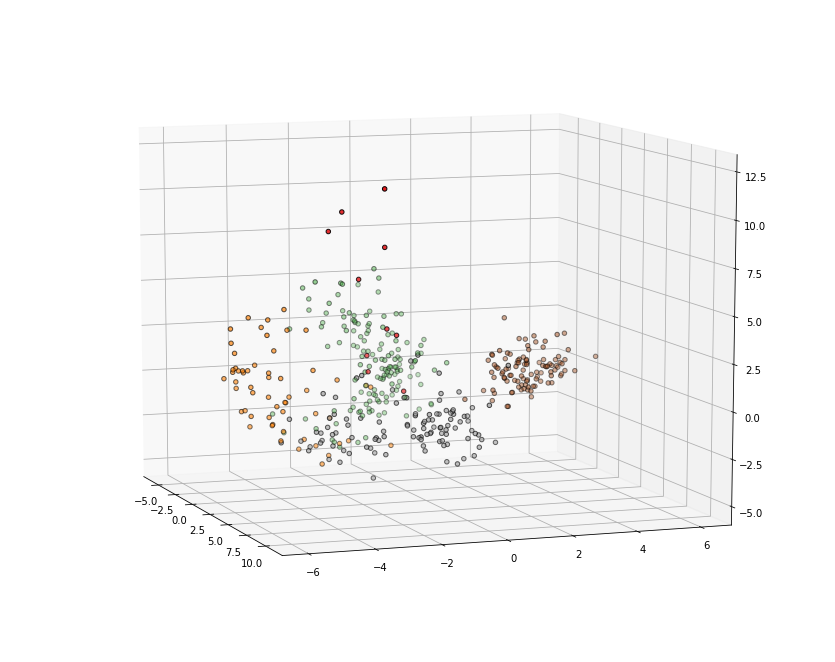

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=-20)

y = gm.predict(f_select) #labels

pca = decomposition.PCA(n_components=3)
X_new = pca.fit_transform(f_select)

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y,cmap=plt.cm.get_cmap('Set1', 5),
           edgecolor='k')



plt.show()

2 dim PCA

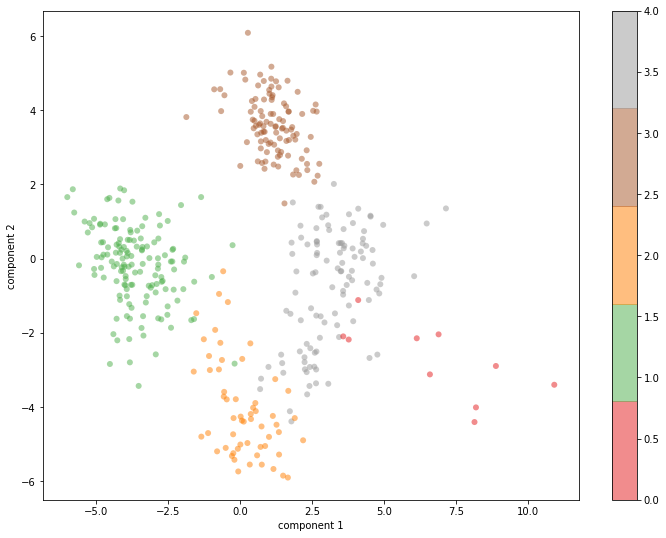

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))

y = gm.predict(f_select) #labels

pca = decomposition.PCA(n_components=2)
X_2 = pca.fit_transform(f_select)
plt.scatter(X_2[:, 0], X_2[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#Diag Covariance

In [47]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5,  covariance_type='diag', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

gm = gm.fit(X)


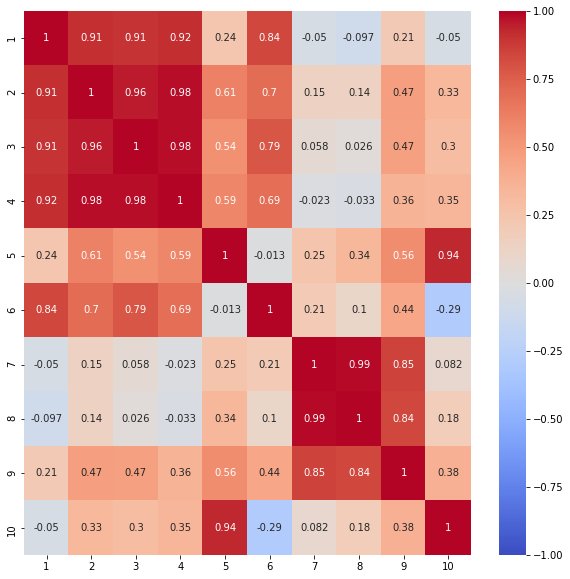

In [48]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_new = pd.DataFrame(gm.covariances_) #covariance matrix with diagonal cv
df_new = df_new.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})
fig, ax = plt.subplots(figsize=(10,10)) #resize
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')